In [2]:
# Install Parquet file requirements
!pip install pyarrow
!pip install fastparquet
    
print('Parquet file packages installed.')

Parquet file packages installed.


In [3]:
import pandas as pd

# Read the raw data CSV file into a pandas DataFrame
df = pd.read_csv('troop_movements.csv')
df.head()

,timestamp,unit_id,unit_type,empire_or_resistance,location_x,location_y,destination_x,destination_y,homeworld
0,2023-06-14 14:18:57,1,tie_fighter,empire,7,4,8,1,Vulpter
1,2023-06-14 14:18:56,2,tie_silencer,resistance,9,10,6,1,Champala
2,2023-06-14 14:18:55,3,x-wing,resistance,1,6,3,8,Tholoth
3,2023-06-14 14:18:54,4,x-wing,empire,1,1,1,2,Kashyyyk
4,2023-06-14 14:18:53,5,stormtrooper,resistance,9,2,1,6,Skako


In [4]:
# Group by 'empire_or_resistence' and count the occurrences
grouped_data = df.groupby(['empire_or_resistance']).size().reset_index(name='count')

# Display the result
print(grouped_data)

  empire_or_resistance  count
0               empire    526
1           resistance    474


In [5]:
# Group by 'homeworld' and count the occurrences
grouped_data = df.groupby(['homeworld']).size().reset_index(name='count')

# Display the result
print(grouped_data)

       homeworld  count
0       Alderaan     27
1    Aleen Minor     16
2     Bestine IV     25
3          Cerea     20
4       Champala     32
5      Chandrila     26
6   Concord Dawn     29
7       Corellia     22
8        Dagobah     25
9       Dathomir     20
10         Dorin     23
11        Eriadu     25
12   Glee Anselm     18
13    Haruun Kal     17
14       Iktotch     19
15      Iridonia     28
16         Kalee     22
17      Kashyyyk     23
18     Malastare     28
19        Mirial     21
20      Mon Cala     26
21    Muunilinst     30
22         Naboo     24
23          Ojom     17
24       Quermia     23
25         Rodia     15
26        Ryloth     32
27       Serenno     15
28         Shili     30
29         Skako     20
30       Socorro     28
31       Stewjon     33
32       Sullust     20
33      Tatooine     24
34       Tholoth     27
35      Toydaria     24
36     Trandosha     23
37       Troiken     25
38          Tund     25
39        Umbara     19
40       Vulpter

In [6]:
# Group by 'unit_type' and count the occurrences
grouped_data = df.groupby(['unit_type']).size().reset_index(name='count')

# Display the result
print(grouped_data)

            unit_type  count
0               at-at    132
1               at-st    120
2  resistance_soldier    124
3        stormtrooper    125
4         tie_fighter    130
5        tie_silencer    116
6             unknown    132
7              x-wing    121


In [7]:
# Add a boolean feature based on 'empire_or_resistance'. Resistance=1 and Empire=0
df['is_resistance'] = df['empire_or_resistance'].apply(lambda x: x == 'resistance')

# Print the updated DataFrame
df.head()

,timestamp,unit_id,unit_type,empire_or_resistance,location_x,location_y,destination_x,destination_y,homeworld,is_resistance
0,2023-06-14 14:18:57,1,tie_fighter,empire,7,4,8,1,Vulpter,False
1,2023-06-14 14:18:56,2,tie_silencer,resistance,9,10,6,1,Champala,True
2,2023-06-14 14:18:55,3,x-wing,resistance,1,6,3,8,Tholoth,True
3,2023-06-14 14:18:54,4,x-wing,empire,1,1,1,2,Kashyyyk,False
4,2023-06-14 14:18:53,5,stormtrooper,resistance,9,2,1,6,Skako,True


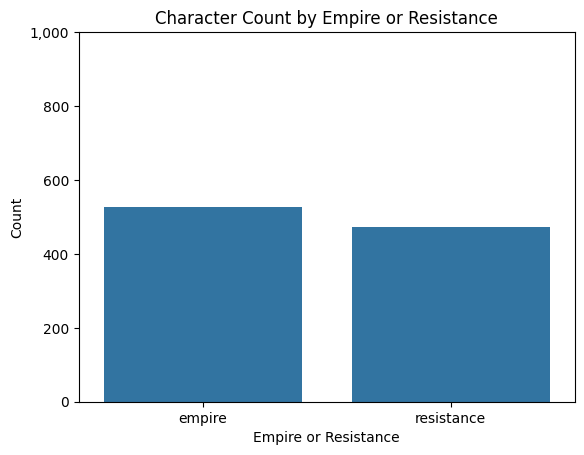

In [8]:
# Create a bar graph to show empire vs resistance distribution

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Count the occurrences of each value in the "empire_or_resistance" column
empire_resistance_counts = df['empire_or_resistance'].value_counts()

# Create the bar plot using seaborn
sns.barplot(x=empire_resistance_counts.index, y=empire_resistance_counts.values)

# Set the y-axis limits and tick format
plt.ylim(0, 1000)
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))


# Set labels and title
plt.xlabel('Empire or Resistance')
plt.ylabel('Count')
plt.title('Character Count by Empire or Resistance')

# Display the plot
plt.show()


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Select the features and target variable
features = ['homeworld', 'unit_type']
target = 'is_resistance'
X = df[features]  # Features
y = df[target]  # Target variable

# Convert categorical features to numeric using one-hot encoding
X_encoded = pd.get_dummies(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Create a decision tree classifier
model = DecisionTreeClassifier()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy score
print('Accuracy:', accuracy)

Accuracy: 0.48


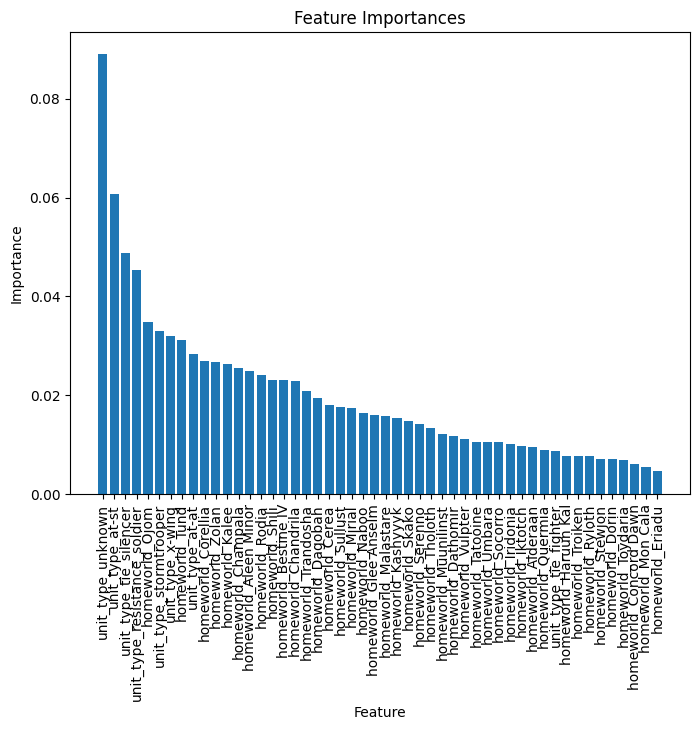

Most Influential Unit Type: unit_type_unknown


In [10]:
# Select the features and target variable
features = ['homeworld', 'unit_type']
target = 'is_resistance'
X = df[features]  # Features
y = df[target]  # Target variable

# Convert categorical features to numeric using one-hot encoding
X_encoded = pd.get_dummies(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Create a decision tree classifier
model = DecisionTreeClassifier()

# Fit the model to the training data
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_

# Create a DataFrame to hold the feature importances
feature_importances = pd.DataFrame({'Feature': X_encoded.columns, 'Importance': importances})

# Sort the DataFrame by importance in descending order
feature_importances = feature_importances.sort_values('Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(8, 6))
plt.bar(feature_importances['Feature'], feature_importances['Importance'])
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()

# Display the most influential unit_type
most_influential_unit_type = feature_importances.iloc[0]['Feature']
print('Most Influential Unit Type:', most_influential_unit_type)

In [11]:
import pickle

# Save trained model
with open('trained_model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [12]:
######################################################################################
# At this point, the model has been trained and saved to disk for use with new data #
# to be predicted.                                                                   #
######################################################################################

In [13]:
# load 'real' data and use the model to predict Empire or Resistance
# Read the raw data CSV file into a pandas DataFrame
df1m = pd.read_csv('troop_movements_1m.csv')
df1m.head()

,timestamp,unit_id,unit_type,location_x,location_y,destination_x,destination_y,homeworld
0,2023-06-03 03:19:15,919214,tie_silencer,2.0,5.0,9,3,Aleen Minor
1,2023-02-24 13:50:40,9467154,stormtrooper,9.0,0.0,9,1,Malastare
2,2023-03-29 19:54:55,6585778,tie_silencer,0.0,6.0,5,9,Serenno
3,2023-04-30 00:58:11,3878023,tie_silencer,4.0,2.0,9,9,Tund
4,2023-04-10 22:00:26,5537117,at-st,6.0,8.0,5,8,Skako


In [14]:
# Find all 'invalid_unit' and replace with unknown
df1m.loc[df1m['unit_type'] == 'invalid_unit', 'unit_type'] = 'unknown'
grouped_data = df1m.groupby(['unit_type']).size().reset_index(name='count')

# Display the result
print(grouped_data)

            unit_type   count
0               at-at  142724
1               at-st  142554
2  resistance_soldier  142647
3        stormtrooper  142611
4         tie_fighter  142753
5        tie_silencer  143216
6             unknown    1001
7              x-wing  142494


In [15]:
# propagate last valid observation forward to next valid for location_x and location_y
df1m[['location_x', 'location_y']] = df[['location_x', 'location_y']].fillna(method='ffill')

# Write the cleaned data to a Parquet file
df1m.to_parquet('cleaned_troop_movements1m.parquet', index=False)

print('Data cleaning complete.')

C:\Users\chris\AppData\Local\Temp\ipykernel_28716\12604725.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df1m[['location_x', 'location_y']] = df[['location_x', 'location_y']].fillna(method='ffill')


Data cleaning complete.


In [16]:
# Load the trained model
with open('trained_model.pkl', 'rb') as file:
    model = pickle.load(file)

# Load clean data from parquet file
df10m = pd.read_parquet('cleaned_troop_movements1m.parquet')
features = ['homeworld', 'unit_type']
new_data = df10m[features]  # Features

# Convert categorical features to numeric using one-hot encoding
new_data_encoded = pd.get_dummies(new_data)

# Assuming you have new data for prediction stored in a pandas DataFrame called 'new_data_encoded'
predictions = model.predict(new_data_encoded)

# You can use the predictions as desired
# print(predictions)

In [17]:
df1m['predictions'] = predictions
df1m.head()

,timestamp,unit_id,unit_type,location_x,location_y,destination_x,destination_y,homeworld,predictions
0,2023-06-03 03:19:15,919214,tie_silencer,7.0,4.0,9,3,Aleen Minor,True
1,2023-02-24 13:50:40,9467154,stormtrooper,9.0,10.0,9,1,Malastare,False
2,2023-03-29 19:54:55,6585778,tie_silencer,1.0,6.0,5,9,Serenno,False
3,2023-04-30 00:58:11,3878023,tie_silencer,1.0,1.0,9,9,Tund,True
4,2023-04-10 22:00:26,5537117,at-st,9.0,2.0,5,8,Skako,False


In [23]:
input_df = pd.DataFrame({"homeworld": ["Naboo"], "unit_type": ["x-wing"]})
print(input_df)
input_df_encoded = pd.get_dummies(input_df)
print(input_df_encoded)
# Ensure the input DataFrame has the same columns as the model expects
if set(input_df_encoded.columns) != set(new_data_encoded.columns):
    missing_cols = set(new_data_encoded.columns) - set(input_df_encoded.columns)
    for col in missing_cols:
        input_df_encoded[col] = 0
    input_df_encoded = input_df_encoded[new_data_encoded.columns]

print(input_df_encoded)
# Make predictions for the input DataFrame
prediction = model.predict(input_df_encoded)


# Print the prediction result
if prediction[0]:
    print("The input data is predicted to be Resistance.")
else:
    print("The input data is predicted to be Empire.")


  homeworld unit_type
0     Naboo    x-wing
   homeworld_Naboo  unit_type_x-wing
0             True              True
   homeworld_Alderaan  homeworld_Aleen Minor  homeworld_Bestine IV  \
0                   0                      0                     0   

   homeworld_Cerea  homeworld_Champala  homeworld_Chandrila  \
0                0                   0                    0   

   homeworld_Concord Dawn  homeworld_Corellia  homeworld_Dagobah  \
0                       0                   0                  0   

   homeworld_Dathomir  ...  homeworld_Vulpter  homeworld_Zolan  \
0                   0  ...                  0                0   

   unit_type_at-at  unit_type_at-st  unit_type_resistance_soldier  \
0                0                0                             0   

   unit_type_stormtrooper  unit_type_tie_fighter  unit_type_tie_silencer  \
0                       0                      0                       0   

   unit_type_unknown  unit_type_x-wing  
0          